In [17]:
import os
import seaborn as sns

In [10]:
base_dir = os.path.join('./cell_images')

In [11]:
base_dir

'./cell_images'

In [13]:
# read train cs file
import pandas as pd
import numpy as np

In [14]:
traindf = pd.read_csv('train.csv')

In [15]:
traindf.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,malaria
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,healthy
2,C59P20thinF_IMG_20150803_111333_cell_144.png,malaria
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,malaria
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,malaria


In [16]:
traindf.shape

(19290, 2)

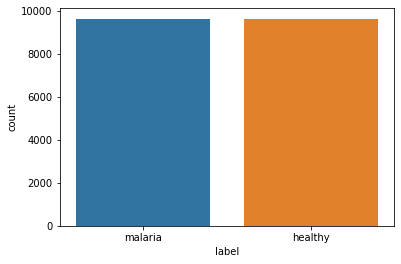

In [19]:
# distribution of malaria/non-malaria images
sns.countplot(traindf['label'])

In [21]:
traindf['label'].value_counts()

malaria    9645
healthy    9645
Name: label, dtype: int64

In [25]:
from skimage.io import imread , imshow
import matplotlib.pyplot as plt

<Figure size 1080x1080 with 0 Axes>

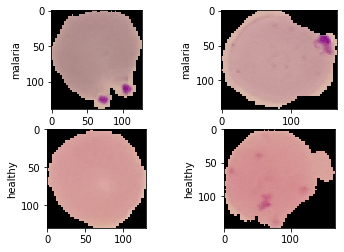

In [32]:
plt.figure(figsize = (15,15))
fig, ax = plt.subplots(nrows = 2 , ncols = 2)

for i in range(2):
    for j in range(2):
        image = imread(os.path.join(base_dir , traindf['filename'][i+ 4 * j]))
        ax[i,j].imshow(image)
        ax[i,j].set_ylabel(traindf["label"][i + 4*j])
        

In [34]:
# Data preparation
from sklearn.model_selection import train_test_split

train_files , val_files , train_labels , val_labels = train_test_split(traindf['filename'] , traindf['label'] , 
                                                                       test_size= 0.2 , random_state = 42 , shuffle = True)

In [40]:
print('Train files shape - ',train_files.shape,'Train labels  shape -' ,train_labels.shape)
print('Validation files shape - ',val_files.shape,'Validation labels  shape -' , val_labels.shape)

Train files shape -  (15432,) Train labels  shape - (15432,)
Validation files shape -  (3858,) Validation labels  shape - (3858,)


In [41]:
from skimage.transform import resize

In [48]:
shapes = []

for i in traindf['filename']:
    image = imread(os.path.join(base_dir,i))
    shapes.append(image.shape)

In [49]:
shapes

[(139, 127, 3),
 (130, 130, 3),
 (148, 139, 3),
 (136, 130, 3),
 (142, 166, 3),
 (148, 166, 3),
 (148, 136, 3),
 (106, 124, 3),
 (130, 130, 3),
 (166, 112, 3),
 (148, 178, 3),
 (118, 109, 3),
 (115, 112, 3),
 (94, 112, 3),
 (157, 127, 3),
 (193, 118, 3),
 (169, 172, 3),
 (118, 121, 3),
 (148, 124, 3),
 (127, 130, 3),
 (142, 151, 3),
 (160, 118, 3),
 (118, 109, 3),
 (94, 103, 3),
 (121, 154, 3),
 (115, 133, 3),
 (127, 148, 3),
 (127, 130, 3),
 (136, 124, 3),
 (133, 145, 3),
 (112, 91, 3),
 (106, 118, 3),
 (130, 148, 3),
 (139, 121, 3),
 (145, 97, 3),
 (121, 145, 3),
 (139, 139, 3),
 (124, 133, 3),
 (136, 136, 3),
 (139, 121, 3),
 (130, 148, 3),
 (136, 130, 3),
 (133, 139, 3),
 (106, 163, 3),
 (115, 100, 3),
 (133, 121, 3),
 (121, 124, 3),
 (127, 133, 3),
 (154, 121, 3),
 (154, 127, 3),
 (169, 139, 3),
 (133, 133, 3),
 (127, 133, 3),
 (145, 142, 3),
 (106, 127, 3),
 (82, 82, 3),
 (115, 118, 3),
 (160, 103, 3),
 (136, 163, 3),
 (124, 139, 3),
 (112, 112, 3),
 (139, 127, 3),
 (127, 118, 3)

In [50]:
print('Minimum Dimension - ', np.min(shapes , axis = 0))
print('Maximum Dimension - ', np.max(shapes , axis = 0))
print('Mean Dimension - ', np.mean(shapes , axis = 0))

Minimum Dimension -  [40 49  3]
Maximum Dimension -  [385 364   3]
Mean Dimension -  [132.9600311  132.58335925   3.        ]


In [52]:
# Method 1- Pixel Values as features
RESIZE_DIM = [50,50]
traindf_features_px = []

for i in train_files:
    image = imread(os.path.join(base_dir, i))
    image = resize(image, RESIZE_DIM)
    features = np.reshape(image,(RESIZE_DIM[0] * RESIZE_DIM[1] * 3))
    traindf_features_px.append(features)
    

In [56]:
traindf_features_px = np.array(traindf_features_px)

In [59]:
traindf_features_px.shape

(15432, 7500)

In [60]:
valdf_features_px = []

for i in val_files:
    image = imread(os.path.join(base_dir, i))
    image = resize(image, RESIZE_DIM)
    features = np.reshape(image,(RESIZE_DIM[0] * RESIZE_DIM[1] * 3))
    valdf_features_px.append(features)

In [61]:
valdf_features_px = np.array(valdf_features_px)

In [62]:
valdf_features_px.shape

(3858, 7500)

In [64]:
# First model , building using Pixel Features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
lg_reg = LogisticRegression()

In [66]:
lg_reg.fit(traindf_features_px,train_labels)

C:\Users\avani\AnacondaLatest\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# train prediction accuracy
train_pred = lg_reg.predict(traindf_features_px)
print('Training model acuracy : ', accuracy_score(train_labels,train_pred))

# test prediction accuracy
val_pred = lg_reg.predict(valdf_features_px)
print('Validation model acuracy : ', accuracy_score(val_labels,val_pred))


Training model acuracy :  0.8007387247278382
Validation model acuracy :  0.6775531363400725


In [69]:
# Method 2 HOG features
from skimage.feature import hog

In [70]:
image = imread(os.path.join(base_dir,train_files.iloc[np.random.randint(0,1000)]))

In [71]:
HOG_IMG_DIM = (128,64)
image1 = resize(image, HOG_IMG_DIM)

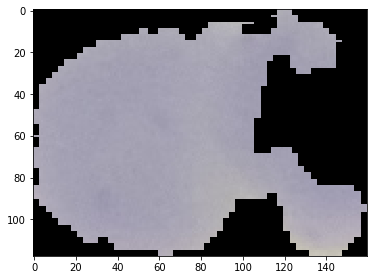

In [72]:
#original image
imshow(image)

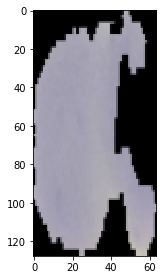

In [73]:
# resize image
imshow(image1)

In [75]:
# calculating hog features and hog image
features , hog_image = hog(image1 , orientations=9,pixels_per_cell = (8,8) , cells_per_block=(2,2), visualize = True,
                          multichannel = True)

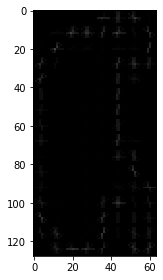

In [76]:
imshow(hog_image)

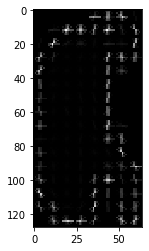

In [77]:
plt.imshow(hog_image, cmap= 'gray')

In [80]:
#Calclulate HOG features for both Test and Train set
# For training set
traindf_features_hog = []

for i in train_files:
    image =  imread(os.path.join(base_dir,i))
    image = resize(image,HOG_IMG_DIM)
    
    #calculating HOG features
    features , hog_image = hog(image , orientations=9,pixels_per_cell = (8,8) , cells_per_block=(2,2), visualize = True,
                          multichannel = True)
    hog_features = np.reshape(features,(features.shape[0]))
    
    traindf_features_hog.append(hog_features)

traindf_features_hog = np.array(traindf_features_hog)

In [82]:
# For validation set
valdf_features_hog = []

for i in val_files:
    image =  imread(os.path.join(base_dir,i))
    image = resize(image,HOG_IMG_DIM)
    
    #calculating HOG features
    features , hog_image = hog(image , orientations=9,pixels_per_cell = (8,8) , cells_per_block=(2,2), visualize = True,
                          multichannel = True)
    hog_features = np.reshape(features,(features.shape[0]))
    
    valdf_features_hog.append(hog_features)

valdf_features_hog = np.array(valdf_features_hog)

In [84]:
lg_reg = LogisticRegression()

lg_reg.fit(traindf_features_hog, train_labels)

# train prediction accuracy
train_pred = lg_reg.predict(traindf_features_hog)
print('Training model acuracy : ', accuracy_score(train_labels,train_pred))

# test prediction accuracy
val_pred = lg_reg.predict(valdf_features_hog)
print('Validation model acuracy : ', accuracy_score(val_labels,val_pred))

C:\Users\avani\AnacondaLatest\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training model acuracy :  0.8993001555209953
Validation model acuracy :  0.8208916537065837
